# Data Homework: Chapter 10

Name:<u> Zach Johnson

Directions: Download the following data from [FRED](https://fred.stlouisfed.org/graph/?g=qJmt) using pandas_datareader.
    
>Civilian Labor Force Level: CLF16OV
>
>All Employees: CE16OV
>
>All Employees (Nonfarm): PAYEMS 
>
>Unemployment Rate: UNRATE
>
>Labor Force Participation Rate: CIVPART
>
>CPI - Total All Items for the United States: CPIAUCSL

1.	Plot the unemployment rate alongside the Labor Force Participation Rate.

In [14]:
import datetime
from datlib.FRED import *
from datlib.plots import *
#Import monetary base
# {data_name1:data_code1,
#  data_name2:data_code2}
data_codes = {
    'Civilian Labor Force Level': 'CLF16OV',
    'All Employees': 'CE16OV',
    'All Employees (nonfarm)': 'PAYEMS',
    'Unemployment Rate': 'UNRATE',
    'Labor Force Participation Rate': 'CIVPART',
    'CPI': 'CPIAUCSL',
    "Monetary Base": "BOGMBASE"
}
# Select start and end dates
start = datetime.datetime(1975, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes=data_codes, start=start, end=end, freq="M")

C:\Users\jzach\Github Repositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


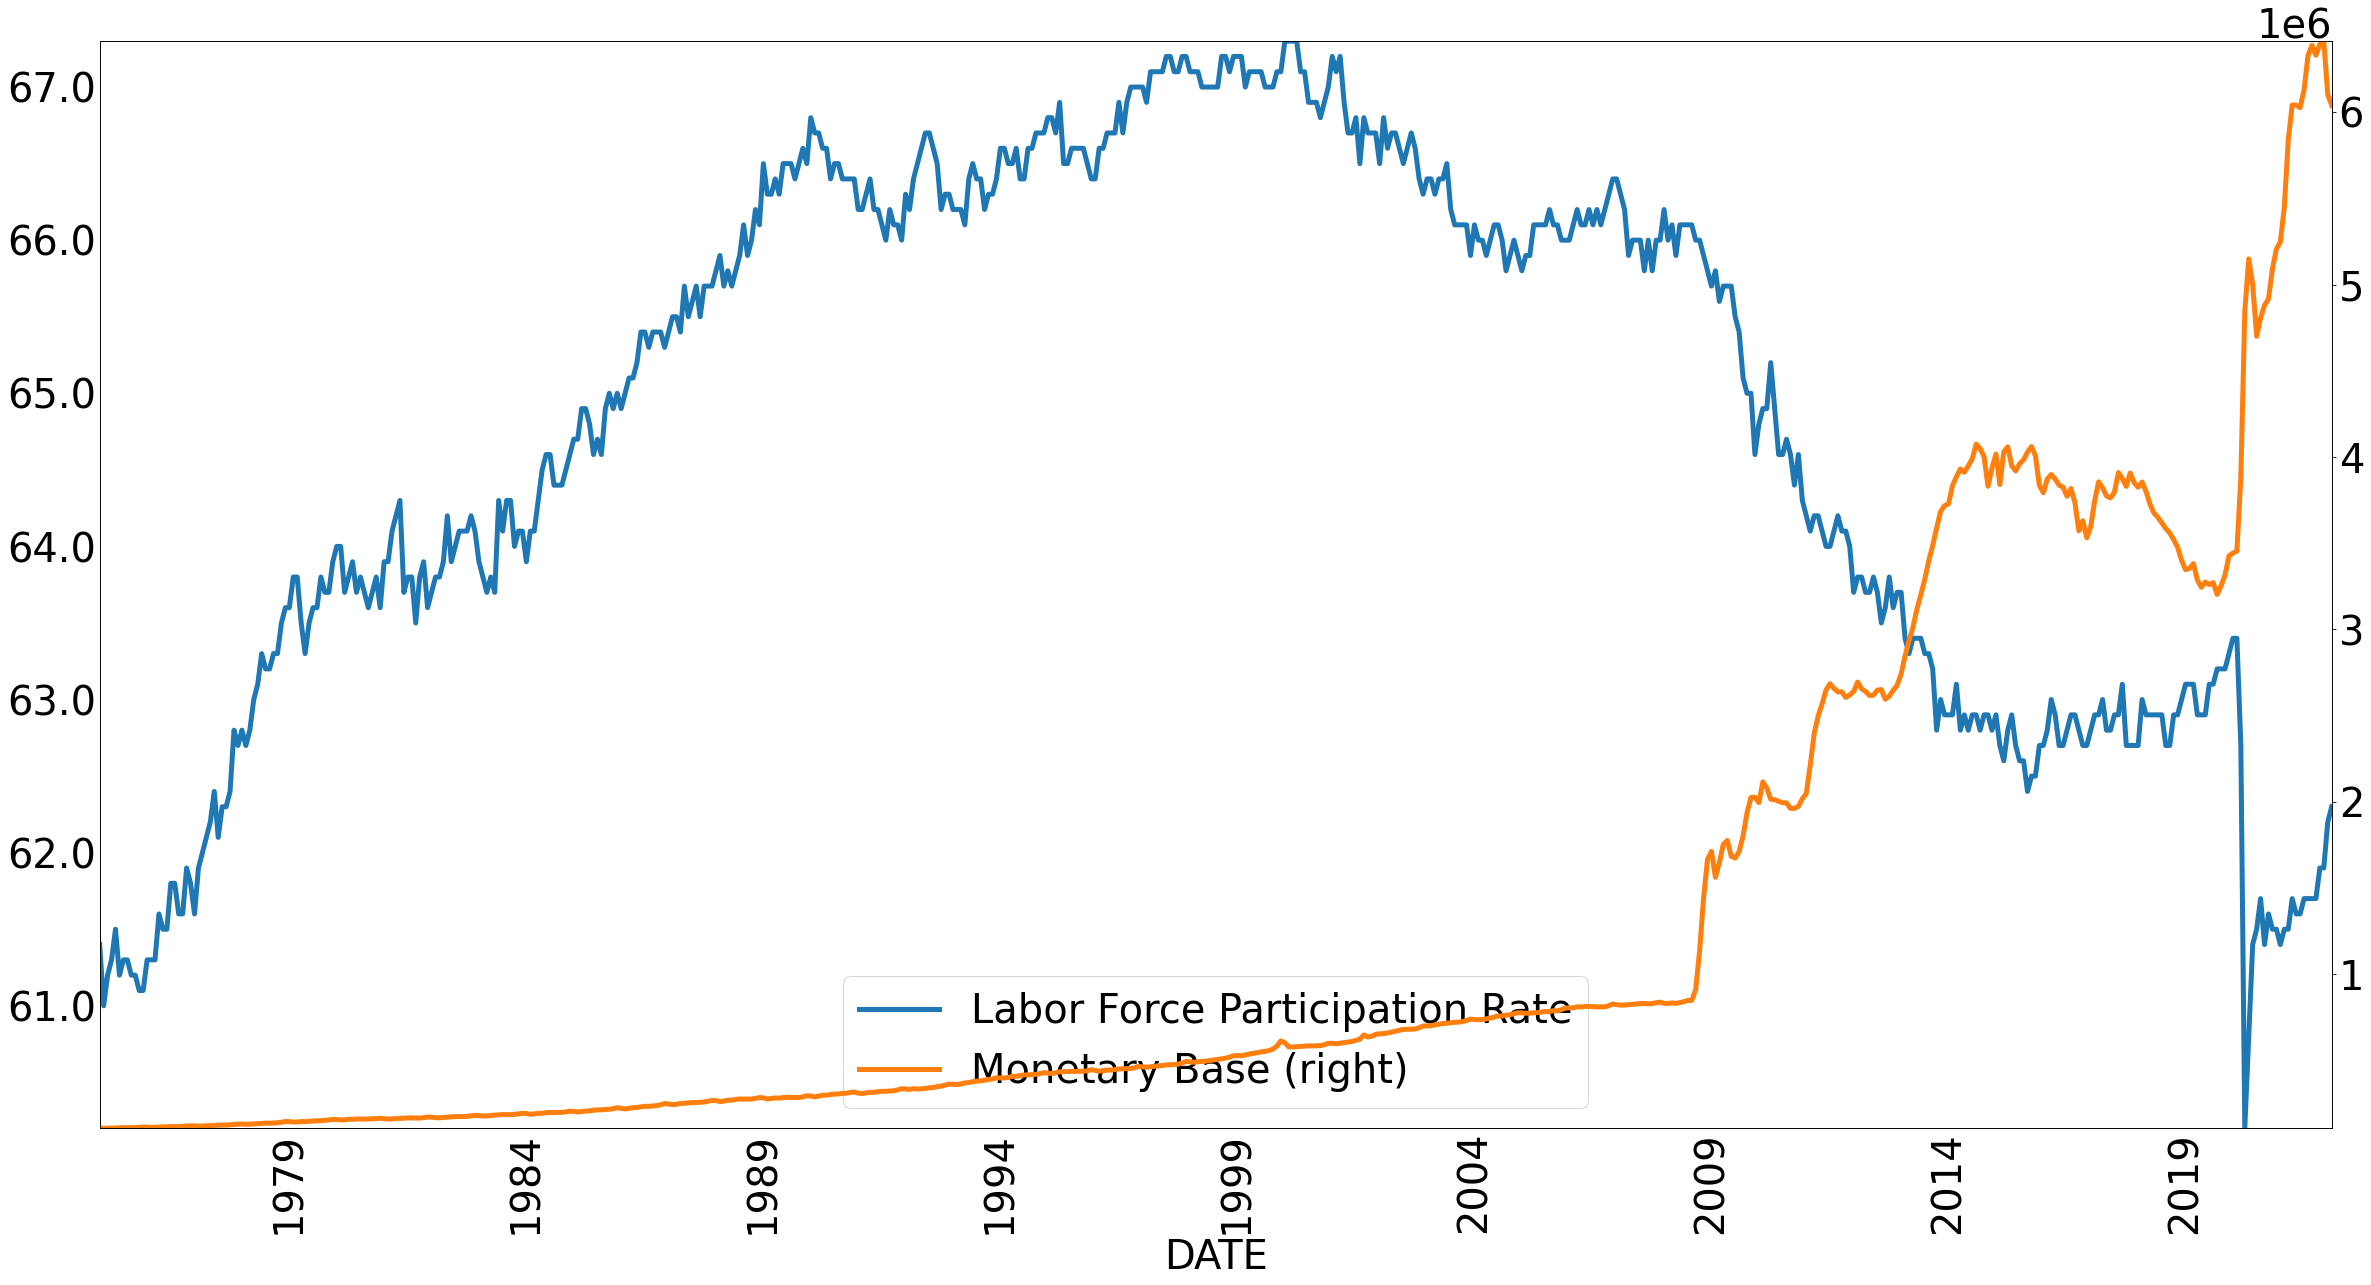

In [15]:
plt.rcParams.update({'font.size': 40})
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0
plot_data = ["Labor Force Participation Rate", "Monetary Base"]
plot_lines(data[plot_data], secondary_y = "Monetary Base", linewidth = 5)

2.	Calculate the employment rate using Civilian Labor Force Level and All Employees (CE16OV).

In [16]:
data["Calculated Employment Rate"] = data["All Employees"] / data["Civilian Labor Force Level"]
data["Calculated Employment Rate"]

DATE
1975-01-31    0.919455
1975-02-28    0.918945
1975-03-31    0.914367
1975-04-30    0.912098
1975-05-31    0.910176
                ...   
2021-11-30    0.958045
2021-12-31    0.961064
2022-01-31    0.960211
2022-02-28    0.961772
2022-03-31    0.963804
Freq: M, Name: Calculated Employment Rate, Length: 567, dtype: float64

3.	Calculate the rate of unemployment using the employment rate data that you calculated in (1). Make sure the data matches the unemployment rate (UNRATE) that was initially downloaded.

In [23]:
data["Calculated Unemployment Rate"] = (data["Calculated Employment Rate"]**(-1) - 1)*100
data[["Calculated Unemployment Rate", "Unemployment Rate"]]

,Calculated Unemployment Rate,Unemployment Rate
DATE,,
1975-01-31,8.760087,8.1
1975-02-28,8.820494,8.1
1975-03-31,9.365279,8.6
1975-04-30,9.637394,8.8
1975-05-31,9.868814,9.0
...,...,...
2021-11-30,4.379233,4.2
2021-12-31,4.051290,3.9
2022-01-31,4.143815,4.0


4.	Graph the unemployment rate you calculated alongside the unemployment rate that you downloaded from FRED.

C:\Users\jzach\Github Repositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


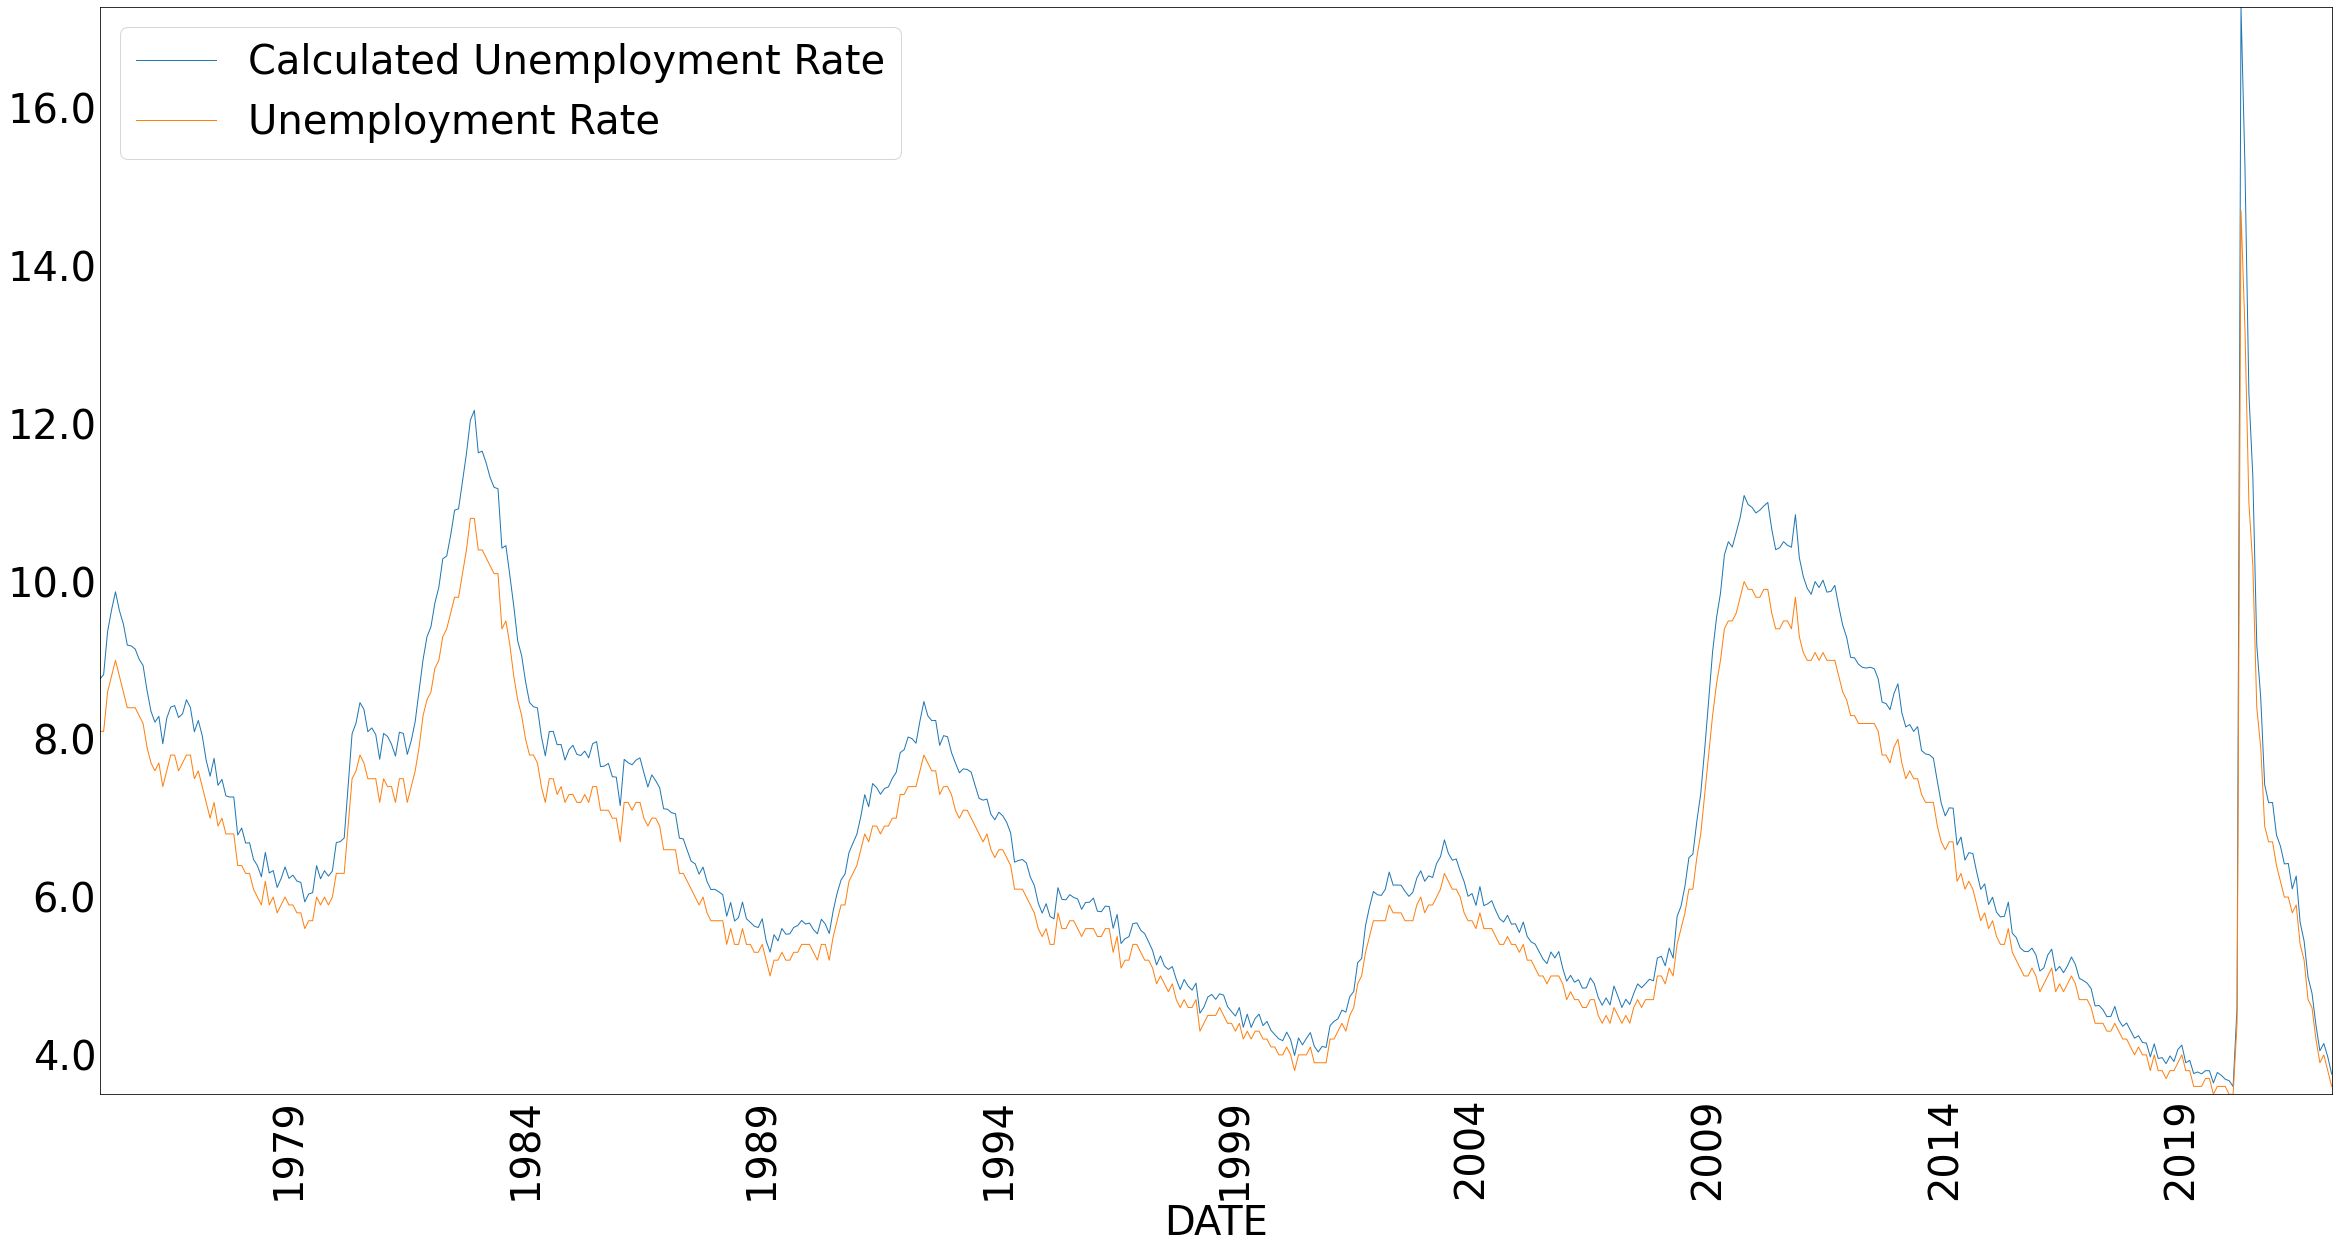

In [24]:
plot_lines(data[["Calculated Unemployment Rate", "Unemployment Rate"]])

5.	Calculate the fraction of labor that works in farming. Plot the newly created data. (Hint: You will have to calculate non-farm labor as a percentage of labor first) 

C:\Users\jzach\Github Repositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


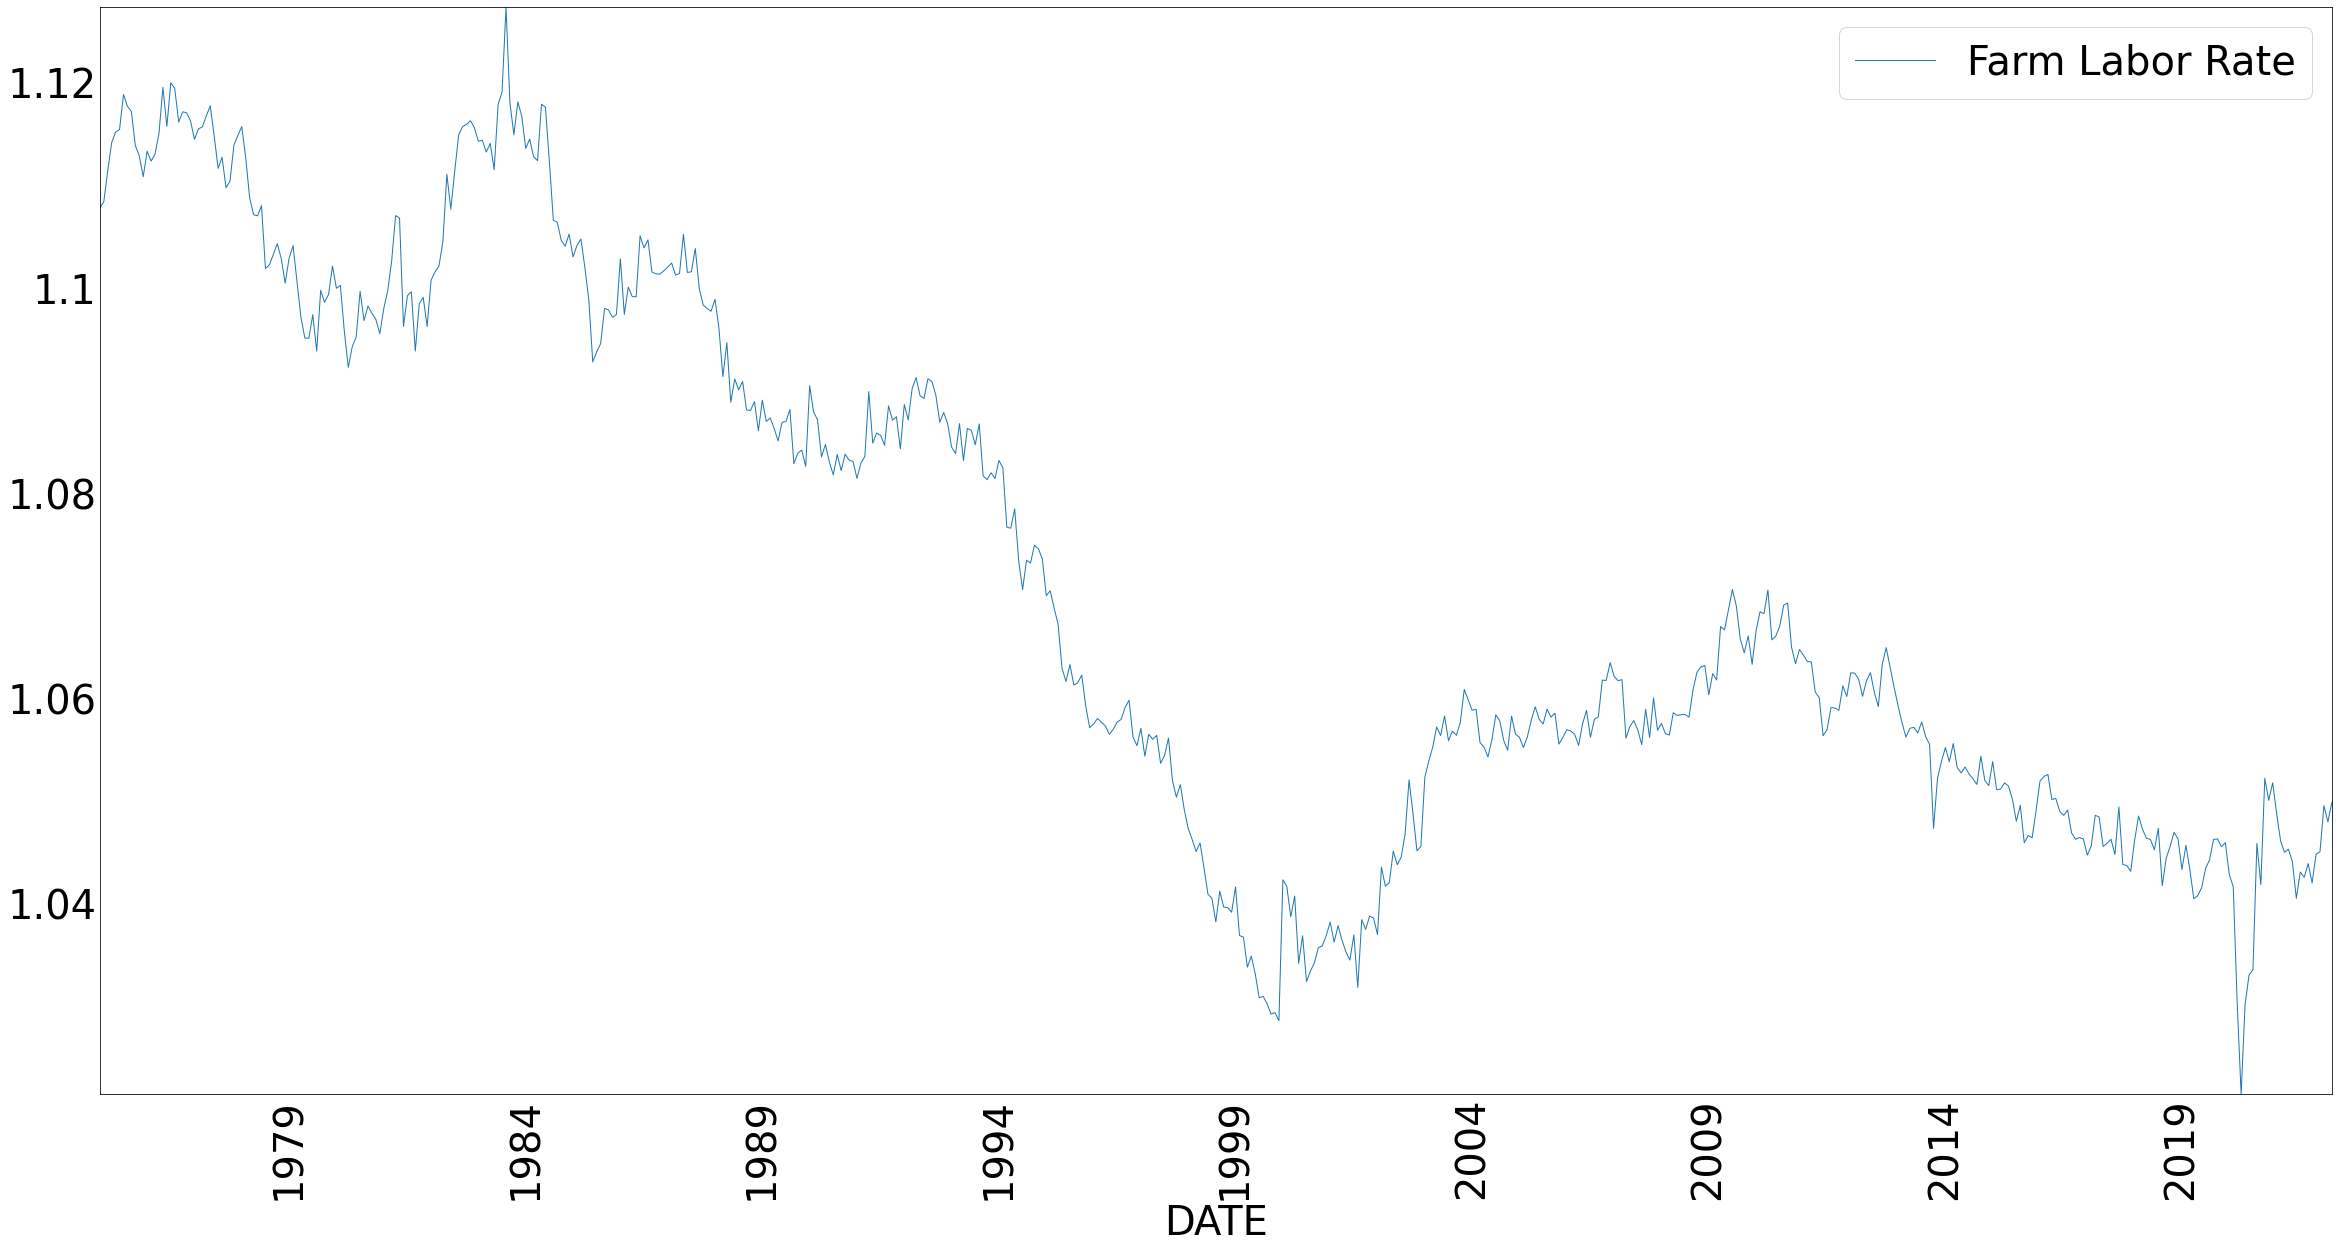

In [28]:
data["Farm Labor Rate"] = (data["All Employees (nonfarm)"] / data["All Employees"])**(-1)
plot_lines(data["Farm Labor Rate"])

6. Calculate the year-over-year rate of inflation using CPI data. Plot the inflation rate against the unemployment rate.

C:\Users\jzach\Github Repositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


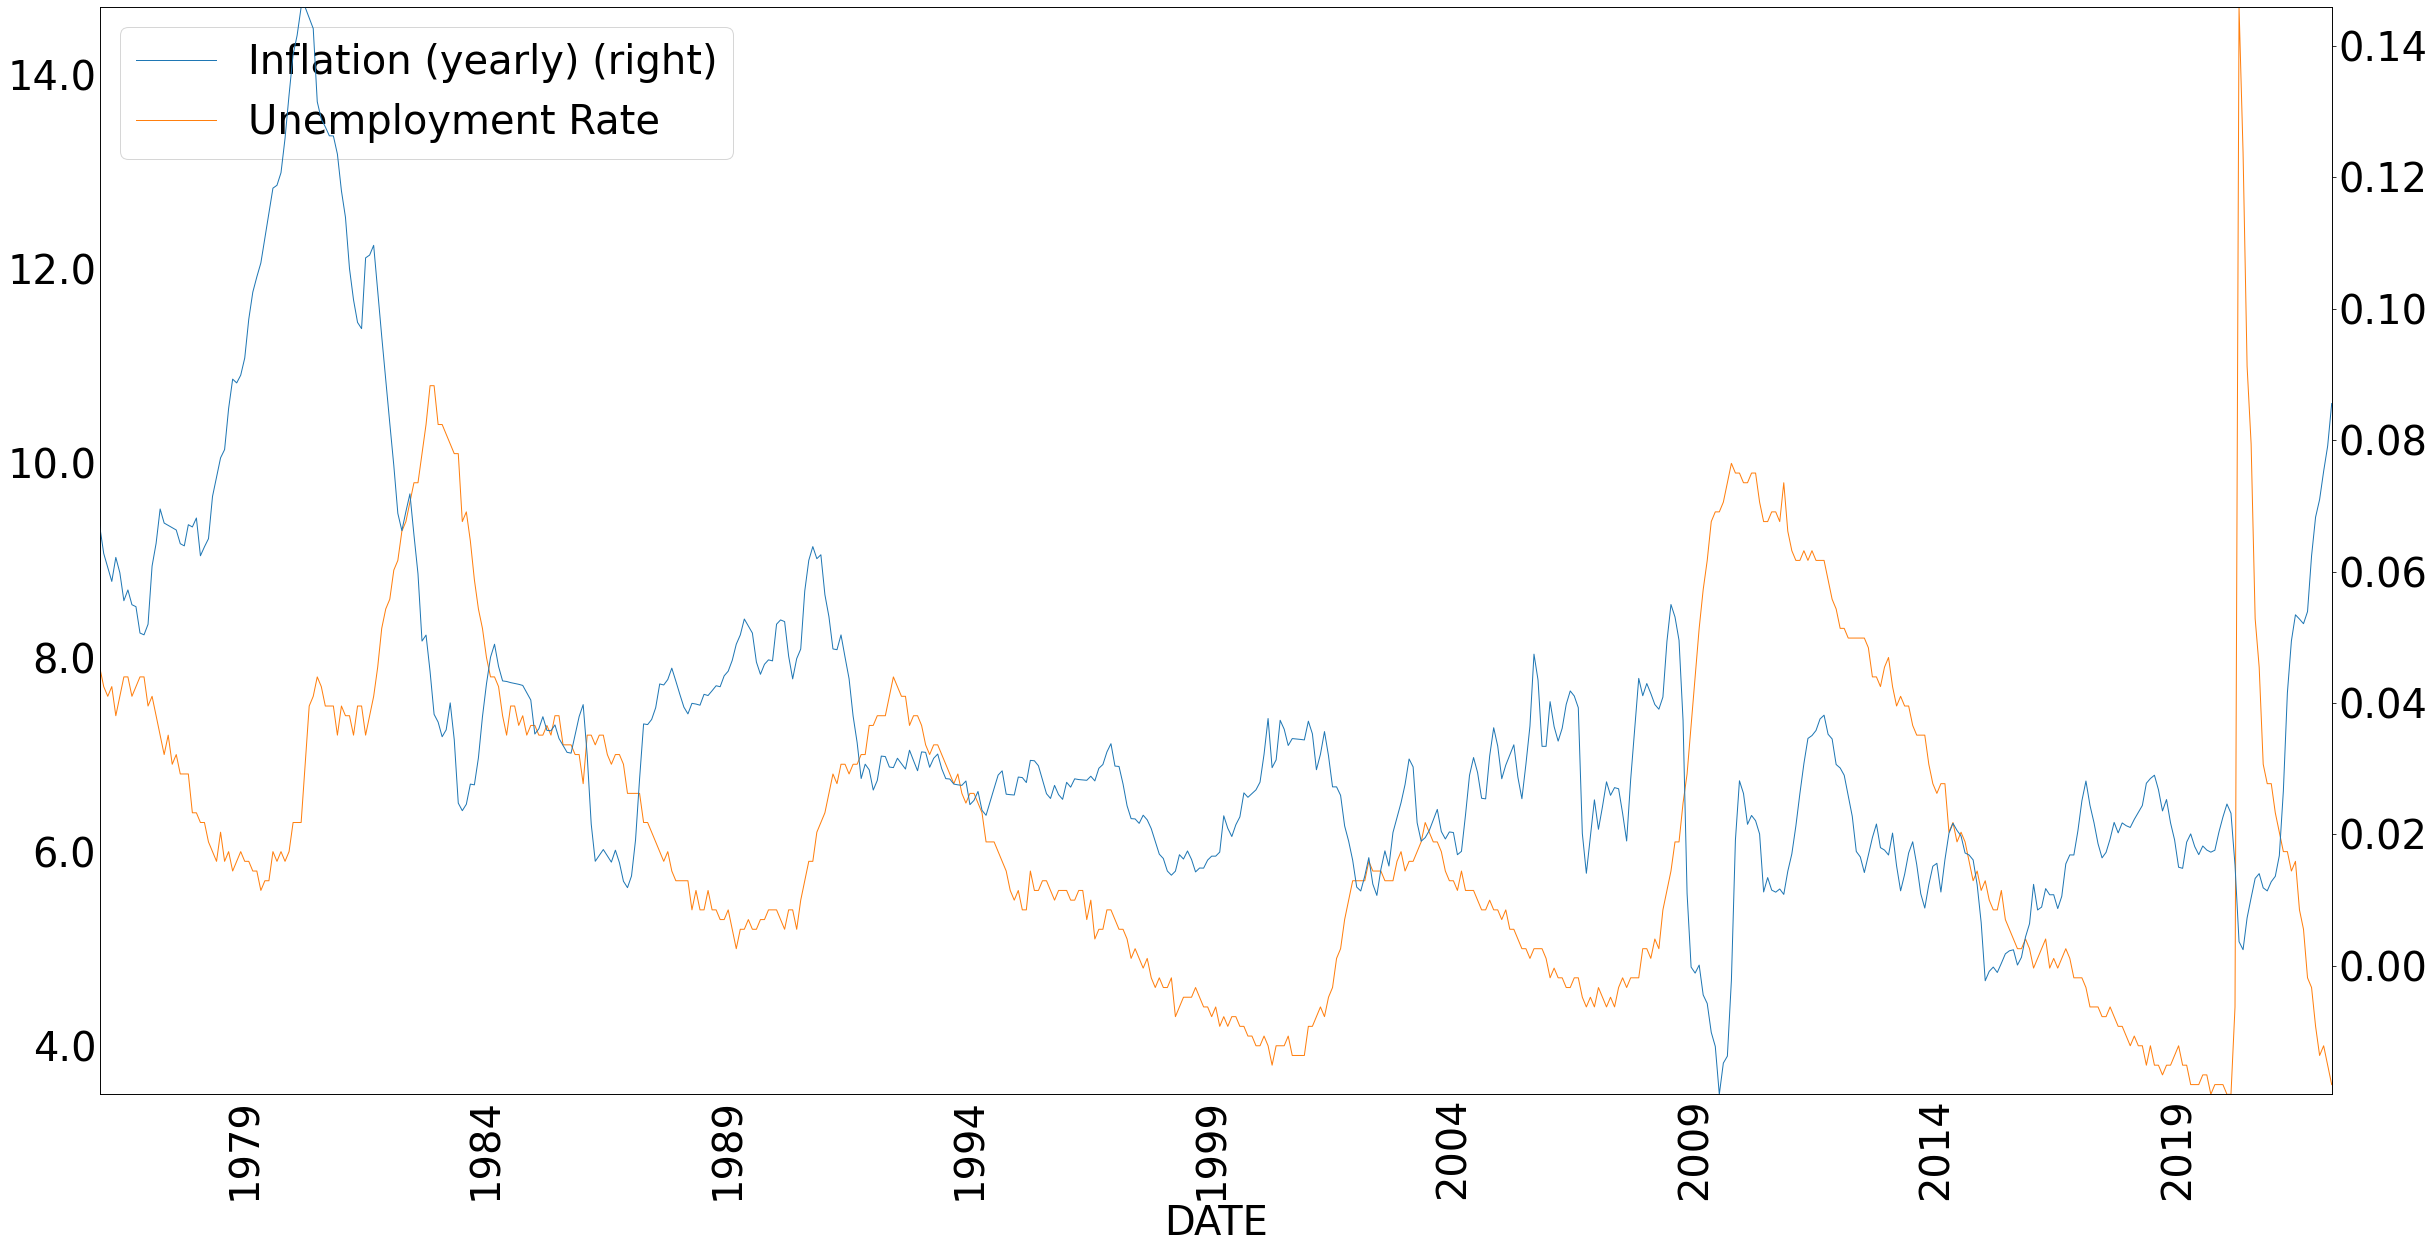

In [37]:
data["Inflation (yearly)"] = data["CPI"].pct_change(12)
plot_vars = ["Inflation (yearly)", "Unemployment Rate"]
plot_lines(data[plot_vars], secondary_y = "Inflation (yearly)")

7. Is there a consistent relationship between unemployement and inflation? Explain your reasoing using macroeconomic theory.

Historically, inflation and unemployment have maintained an inverse relationship, as represented by the Phillips curve. Low levels of unemployment correspond with higher inflation, while high unemployment corresponds with lower inflation and even deflation. The chart seems to show thsi inverse relationship as thet two generally move away from one another, but a statistical model of correlation would be better than just the graph. But apparently R^2 has  nothing to do with correlation. 

8.	Go to the BLS website: https://www.bls.gov/cps/definitions.htm#nilf. Explain why some persons might not be considered as part of the labor force even if they would like to have a job. How do you think this effects the estimate of the unemployment rate

If the person is "discouraged", they are not considered part of the labor force. This means that they would like a job but they believe that one is not avaliable. These kind of seem like arbitrary decisions as to who is counted and who isnt but as long as the definitions are clear its fine. 